1 data is in different folders

2 may depend on file name to say the error data?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os
import glob
#import packages

def getDict(file):
    """This function reads a pickle file 
    and returns the dictionary stored in it"""

    with open(file,'rb') as f:
        SQUID_dict = pkl.load(f)
        #print(type(SQUID_dict.keys()))
    return SQUID_dict

def getPString(dict):
    """This function returns the pathstring from the dictionary"""
    pstring = dict['pstring']
    return pstring

def getUnifiedTrans(dict, u_Vpp = 0.005):
    """This function returns the unified transimpedance from the dictionary"""
    unified_Vpp = u_Vpp
    Trans = dict['transimpedance']
    Vpp = dict['Vpp']
    unified_Trans = unified_Vpp/Vpp*Trans
    return unified_Trans


In [3]:
#get all data file from the directory

folder_path = './20240606_010332_tune_squid/data'

# Use glob to list all .pkl files in the directory
pkl_files = glob.glob(os.path.join(folder_path, '*.SQUID_OUTPUT.pkl'))

# Filter files that are larger than 10KB (10 * 1024 bytes)
files_above_10kb = [file for file in pkl_files if os.path.getsize(file) > (10 * 1024)]
#print(files_above_10kb)

In [4]:
#a empty dictionary to store diff pkl files
data = {}

#save the date to a Dictioanry
for i in range(len(files_above_10kb)):
    file_name = files_above_10kb[i].split('\\')[-1]
    print(file_name)
    data[f'{file_name}'] = getDict(files_above_10kb[i])
    #break

#print(data)

IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_2.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_3.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_4.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_1.Mezz_2.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_1.Mezz_2.SQCB.SQUIDModule_2.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_1.Mezz_2.SQCB.SQUIDModule_3.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_1.Mezz_2.SQCB.SQUIDModule_4.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_10.Mezz_1.SQCB.SQUIDModule_2.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_10.Mezz_1.SQCB.SQUIDModule_3.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_10.Mezz_1.SQCB.SQUIDModule_4.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_12.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_12.Mezz_1.SQCB.SQUIDModule_2.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_12.Mezz_1.SQCB.SQUIDModule_3.SQUID_OUTPUT.pkl
IceCrate_014.IceBoard_12.Mezz_1.SQCB.SQUIDModule_4.SQUID

In [16]:
# analysis the data
for key in data.keys():
    print(f"Data from {key}")
    for i in data[key].keys():
        print(i,f": {data[key][i]}")
   

Data from IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl
target : IceCrate('014').Dfmux(slot=1).MGMEZZ04(1,'247').SQUIDController(None).SQUIDModule(1).SQUID
reduced_target : IceCrate(014).IceBoard(1).Mezz(1).SQCB.SQUIDModule(1).SQUID
title : Squid Tuning for IceCrate('014').Dfmux(slot=1).MGMEZZ04(1,'247').SQUIDController(None).SQUIDModule(1).SQUID
squid_id : Correct.1
squid_pstring : 014/1/1/1
hwm_dir : /home/polarbear/hardware_maps/polarbear/PB2b/commissioning/202305_crate_test/crate_hwm_202310_shift_disable_bad_sq.yaml
hwm_name : PB2 HWM
intermediate_vphis : {'target': "IceCrate('014').Dfmux(slot=1).MGMEZZ04(1,'247').SQUIDController(None).SQUIDModule(1).SQUID", 'reduced_target': 'IceCrate(014).IceBoard(1).Mezz(1).SQCB.SQUIDModule(1).SQUID', 'squid_id': 'Correct.1', 'title': "Squid V-Phi for\nIceCrate('014').Dfmux(slot=1).MGMEZZ04(1,'247').SQUIDController(None).SQUIDModule(1).SQUID", 'vphis': {'description': 'VPhi Plots for a range of current biases', 'ax_labels': 

In [15]:
#check the intermediate_vphis
intermediate_vphis = data["IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl"]["intermediate_vphis"]

for i in intermediate_vphis:
    print(i, f"{intermediate_vphis[i]}") #detial info: 
print("")
#check the vphis in the intermediate_vphis
vphis = intermediate_vphis["vphis"]
for i in vphis:
    print(i,f": {vphis[i]}")

#CB_ is the plot data for figure1

target IceCrate('014').Dfmux(slot=1).MGMEZZ04(1,'247').SQUIDController(None).SQUIDModule(1).SQUID
reduced_target IceCrate(014).IceBoard(1).Mezz(1).SQCB.SQUIDModule(1).SQUID
squid_id Correct.1
title Squid V-Phi for
IceCrate('014').Dfmux(slot=1).MGMEZZ04(1,'247').SQUIDController(None).SQUIDModule(1).SQUID
vphis {'description': 'VPhi Plots for a range of current biases', 'ax_labels': {'xaxis': 'Flux Bias [Volts at DAC]', 'yaxis': 'Voltage Offset [Volts at DAC]', 'xaxis2': 'Flux Bias [Current through input coil in uA]', 'yaxis2': 'Voltage Offset [Volts at SQUID output in mV]'}, 'ax_scales': {'xaxis': (1.0, 0.0), 'yaxis': (1.0, 0.0), 'xaxis2': (0.0, 33.3555703802535), 'yaxis2': (-33.08628904182107, 13.234515616728427)}, 'CB_0.6': {'label': 'SQUID Current Bias at DAC is 0.6 V', 'y': [2.542845525665459, 2.5423971467804436, 2.54254831021968, 2.5426130911237093, 2.5423551086118334, 2.5426026907505457, 2.542459864045123, 2.542378677454433, 2.542772534920511, 2.542534488330965, 2.545380261627113,

SQUID Current Bias at DAC is 0.6  V
SQUID Current Bias at DAC is 0.65 V
SQUID Current Bias at DAC is 0.70 V
SQUID Current Bias at DAC is 0.75 V
SQUID Current Bias at DAC is 0.80 V
SQUID Current Bias at DAC is 0.85 V
SQUID Current Bias at DAC is 0.90 V
SQUID Current Bias at DAC is 0.95 V


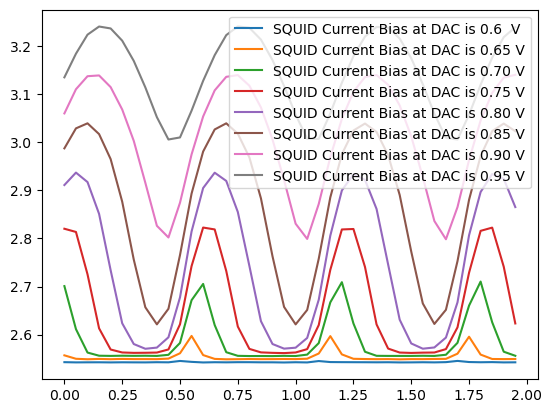

In [23]:
#try to plot the figure1
for key in vphis:
    if "CB" in key:
        label = vphis[key]['label']
        label = label[:33]+" V"
        print(label)
        y = vphis[key]['y']
        x = vphis[key]['x']
        plt.plot(x,y,label = label)
plt.legend()
plt.show()

In [8]:
#check the cb_optimization 
cb_optimization = data["IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl"]["cb_optimization"]
for i in cb_optimization:
    print(i, f": {cb_optimization[i]}")

# show some details info of the data
#figure2 

description : Current Bias Optimization (Voltage Offset Peak-to-Peak vs Current Bias Voltage)
ax_labels : {'xaxis': 'Squid Current Bias [Volts at DAC]', 'yaxis': 'Voltage Offset Peak to Peak, [Volts at DAC]'}
v_p2p : {'label': 'Peak to Peak Voffset', 'y': [0.003121694019510457, 0.04856442596290078, 0.1499451926884965, 0.2608587225999397, 0.36607437954746125, 0.4177153109420968, 0.33669097392882996, 0.23475994288740054], 'x': array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}
v_maxima : {'label': 'Maximum Voltage Offset', 'y': [2.545380261627113, 2.597388707937005, 2.7054382745493646, 2.8225706610240966, 2.93676147389458, 3.0391611787250343, 3.138654776612625, 3.2402926036917297], 'x': array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}
v_minima : {'label': 'Minimum Voltage Offset', 'y': [2.5422585676076026, 2.5488242819741043, 2.555493081860868, 2.561711938424157, 2.570687094347119, 2.6214458677829375, 2.801963802683795, 3.005532660804329], 'x': array([0.6 , 0.65, 0.7 , 0.75

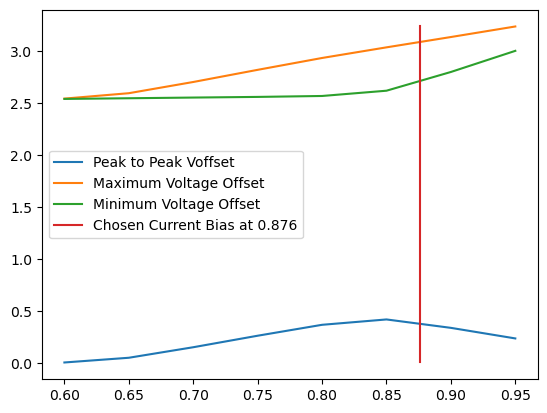

In [9]:
#try plot figure2
for key in cb_optimization:
    if "v" in key or "chosen_point" in key:
        label = cb_optimization[key]['label']
        y = cb_optimization[key]['y']
        x = cb_optimization[key]['x']
        plt.plot(x,y,label = label)
plt.legend()
plt.show()

In [10]:
final_vphi = data["IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl"]["final_vphi"]

for i in final_vphi:
    print(i)
print("")
final_vphis = final_vphi["vphis"]

for i in final_vphis:
    print(i, f": {final_vphis[i]}")

#show final state? why?  


target
reduced_target
squid_id
title
vphis
flux_bias_vals
current_bias_vals
hwm_dir
hwm_name
peaks
outcome

description : VPhi Plots for a range of current biases
ax_labels : {'xaxis': 'Flux Bias [Volts at DAC]', 'yaxis': 'Voltage Offset [Volts at DAC]', 'xaxis2': 'Flux Bias [Current through input coil in uA]', 'yaxis2': 'Voltage Offset [Volts at SQUID output in mV]'}
ax_scales : {'xaxis': (1.0, 0.0), 'yaxis': (1.0, 0.0), 'xaxis2': (0.0, 33.3555703802535), 'yaxis2': (-33.08628904182107, 13.234515616728427)}
CB_0.8757771508129529 : {'label': 'SQUID Current Bias at DAC is 0.8757771508129529 V', 'y': [3.0246959132297357, 3.07230710563038, 3.092056465827623, 3.082364119449709, 3.047053190007159, 2.9861402004599538, 2.8937391110526085, 2.7857075295306752, 2.707969294882711, 2.7158084583559248, 2.81808590778866, 2.935931984039425, 3.0176206832160317, 3.0691702829709513, 3.0913125729224333, 3.084310486445084, 3.0496317434147873, 2.990544900957955, 2.901010356576181, 2.7931351409908736, 2.7084

In [11]:
chosen_parameters = data["IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl"]["chosen_parameters"]
for i in chosen_parameters:
    print(i, f" {chosen_parameters[i]}")

#???


flux_bias  0.27330257160851734
current_bias  0.8757771508129529
peak2peak  0.3759437798478871


In [12]:
possible_fb_choices = data["IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl"]["possible_fb_choices"]
for i in possible_fb_choices:
    print(i, f" {possible_fb_choices[i]}")

#mean and average for what?

at_mean_voffset  0.29660514321703463
at_mean_fluxbias  0.25
average_of_both_choices  0.27330257160851734


In [13]:
fb_optimization = data["IceCrate_014.IceBoard_1.Mezz_1.SQCB.SQUIDModule_1.SQUID_OUTPUT.pkl"]["fb_optimization"]
for i in fb_optimization:
    print(i, f":  {fb_optimization[i]}")

#figure 3

description :  Flux Bias Optimization (For a single V-Phi curve at chosen current bias)
ax_labels :  {'xaxis': 'Flux Bias [Volts at DAC]', 'yaxis': 'Voltage Offset [Volts at DAC]', 'xaxis2': 'Flux Bias [Current through input coil in uA]', 'yaxis2': 'Voltage Offset [Volts at SQUID output in mV]'}
ax_scales :  {'xaxis': (1.0, 0.0), 'yaxis': (1.0, 0.0), 'xaxis2': (0.0, 33.3555703802535), 'yaxis2': (-33.08628904182107, 13.234515616728427)}
vphi_curve :  {'label': 'SQUID Current Bias at 0.876', 'y': [3.0246959132297357, 3.07230710563038, 3.092056465827623, 3.082364119449709, 3.047053190007159, 2.9861402004599538, 2.8937391110526085, 2.7857075295306752, 2.707969294882711, 2.7158084583559248, 2.81808590778866, 2.935931984039425, 3.0176206832160317, 3.0691702829709513, 3.0913125729224333, 3.084310486445084, 3.0496317434147873, 2.990544900957955, 2.901010356576181, 2.7931351409908736, 2.7084799920986335, 2.711949189802448, 2.8119168018777416, 2.925011948671599, 3.0107668600383506, 3.06585591265

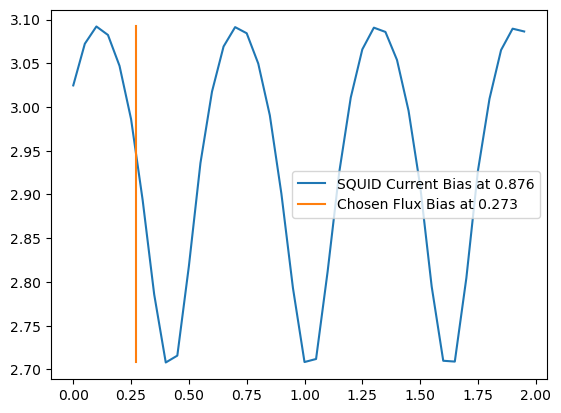

In [14]:
#try plot figure3
for key in fb_optimization:
    if "vphi_curve" in key or "chosen_point" in key:
        label = fb_optimization[key]['label']
        y = fb_optimization[key]['y']
        x = fb_optimization[key]['x']
        plt.plot(x,y,label = label)
plt.legend()
plt.show()
